# Applying sentiment analysis to your social network

# Español

## Step 1: Extract Data

In [1]:
import tweepy
from tweepy import OAuthHandler
import csv
from textblob import TextBlob

import twitterCredentials

In [2]:
api_key = twitterCredentials.api_key
api_secret = twitterCredentials.api_secret
access_token = twitterCredentials.access_token
access_secret = twitterCredentials.access_secret

auth = OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
timeline = api.user_timeline(id="CNNEE", count=50 )

with open('CNNEE.csv', 'w', newline='', encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Day", "Tweet", "Retweets", "Likes"])
    
    for tweet in timeline:
        b = TextBlob(tweet.text)

        if b.detect_language() == 'es':
            print(tweet.text)
            data = [tweet.created_at.date().strftime("%b %d %Y "), tweet.created_at.date().strftime("%b %d"), tweet.text, tweet.retweet_count, tweet.favorite_count]
            writer.writerow(data)
        

A los niños con trastorno por déficit de atención e hiperactividad ahora se les puede recetar un videojuego… https://t.co/tFUX4xFZrL
Este estudio utilizó modelos de transmisión para calcular la susceptibilidad ante la enfermedad y la relación de la… https://t.co/LZcPEwBGrg
Las acciones de la compañía se han disparado más del 250% en lo que va del año. Zoom ahora vale más de 67.000 millo… https://t.co/pHOGz61Y6C
RT @deportescnn: MLB: varios jugadores y personal dan positivo por covid-19, según reporte https://t.co/xPQBJwj7lY
La racha campeona del Bayern, entre las más longevas de Europa https://t.co/CnjVcZUfgv
RT @deportescnn: Entrenador de la NBA: "No quiero morir por ser negro" https://t.co/iTGk0aGb3c
Brasil reporta 34.918 nuevos casos de coronavirus en un día https://t.co/Ym5VxdiiDd https://t.co/Ywx5vQK6VQ
Jeanine Áñez propuso esta postergación luego de una serie de cuestionamientos de sectores políticos de Bolivia, que… https://t.co/knQ9Rb4gdj
Una investigación realizada en el Reino

###  Facebook

In [4]:
from facebook_scraper import get_posts

In [5]:
for post in get_posts('djangogirlsbogota', pages=1):
    print(post['text'])

SAT, NOV 24, 2018
Taller de Programación para Mujeres Bogotá
ARGENTINAENPYTHON.COM
Taller Django Girls en Cali
Django Girls Colombia
April 24, 2018 at 10:00 PM ·
¡Queremos animar a más mujeres a dominar la web!
Es por eso que desde Django Girls Colombia y Python Cali con el apoyo de Argentina en Python, Python Colombia y Python Software Foundation estamos organizando un taller en el cual podrás construir tu propio sitio web desde cero en un día. Además, vamos a utilizar todas las herramientas que programadores profesionales utilizan diariamente. ¡Y de una manera muy sencilla!
Para poder participar de este taller, debes inscribirte en la página oficial del evento http://miprimeraweb.org siguiendo el enlace "¡Quiero inscribirme!" y esperar un email de confirmación el día indicado en la página del evento ya que los cupos son limitados.
El taller es totalmente ¡GRATUITO!, anímate a disfrutar de esta oportunidad e inscríbete.
Plazo para inscripciones hasta el 12 de Mayo.
Aclaración: haciend

## Step 2: Load Data

In [6]:
import pandas as pd

import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

%matplotlib inline

In [7]:
datos_csv = pd.read_csv('CNNEE.csv')
datos_csv.head()

,Date,Day,Tweet,Retweets,Likes
0,Jun 16 2020,Jun 16,A los niños con trastorno por déficit de atenc...,4,20
1,Jun 16 2020,Jun 16,Este estudio utilizó modelos de transmisión pa...,11,20
2,Jun 16 2020,Jun 16,Las acciones de la compañía se han disparado m...,23,53
3,Jun 16 2020,Jun 16,RT @deportescnn: MLB: varios jugadores y perso...,4,0
4,Jun 16 2020,Jun 16,"La racha campeona del Bayern, entre las más lo...",6,34


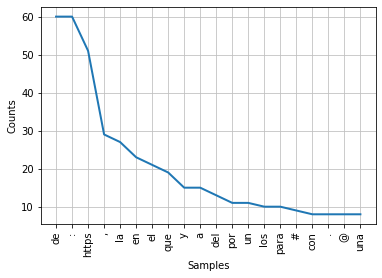

In [8]:
Post = ""
for data in datos_csv['Tweet']:
    Post += data
    
freq = FreqDist(word_tokenize(Post))
freq.plot(20)

## Step 3: Clean Data

In [9]:
import emoji
import re

from nltk.corpus import stopwords
import string

In [10]:
stopwordList = stopwords.words("Spanish")
stopwordList

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [11]:
punctuationList = list(string.punctuation)
punctuationList

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [12]:
stopwordsList = stopwordList + punctuationList + ['“','”','¡','¿',"''",'``','...','→','⬥','…'] + stopwords.words("English")
stopwordsList

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [13]:
Post

'A los niños con trastorno por déficit de atención e hiperactividad ahora se les puede recetar un videojuego… https://t.co/tFUX4xFZrLEste estudio utilizó modelos de transmisión para calcular la susceptibilidad ante la enfermedad y la relación de la… https://t.co/LZcPEwBGrgLas acciones de la compañía se han disparado más del 250% en lo que va del año. Zoom ahora vale más de 67.000 millo… https://t.co/pHOGz61Y6CRT @deportescnn: MLB: varios jugadores y personal dan positivo por covid-19, según reporte https://t.co/xPQBJwj7lYLa racha campeona del Bayern, entre las más longevas de Europa https://t.co/CnjVcZUfgvRT @deportescnn: Entrenador de la NBA: "No quiero morir por ser negro" https://t.co/iTGk0aGb3cBrasil reporta 34.918 nuevos casos de coronavirus en un día https://t.co/Ym5VxdiiDd https://t.co/Ywx5vQK6VQJeanine Áñez propuso esta postergación luego de una serie de cuestionamientos de sectores políticos de Bolivia, que… https://t.co/knQ9Rb4gdjUna investigación realizada en el Reino Unido 

In [14]:
def clean_tweets_emoji(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    
    return clean_text

In [15]:
tweets_clean_emoji = clean_tweets_emoji(Post)
tweets_clean_emoji

'A los niños con trastorno por déficit de atención e hiperactividad ahora se les puede recetar un videojuego… https://t.co/tFUX4xFZrLEste estudio utilizó modelos de transmisión para calcular la susceptibilidad ante la enfermedad y la relación de la… https://t.co/LZcPEwBGrgLas acciones de la compañía se han disparado más del 250% en lo que va del año. Zoom ahora vale más de 67.000 millo… https://t.co/pHOGz61Y6CRT @deportescnn: MLB: varios jugadores y personal dan positivo por covid-19, según reporte https://t.co/xPQBJwj7lYLa racha campeona del Bayern, entre las más longevas de Europa https://t.co/CnjVcZUfgvRT @deportescnn: Entrenador de la NBA: "No quiero morir por ser negro" https://t.co/iTGk0aGb3cBrasil reporta 34.918 nuevos casos de coronavirus en un día https://t.co/Ym5VxdiiDd https://t.co/Ywx5vQK6VQJeanine Áñez propuso esta postergación luego de una serie de cuestionamientos de sectores políticos de Bolivia, que… https://t.co/knQ9Rb4gdjUna investigación realizada en el Reino Unido 

In [16]:
def clean_tweets_regex(text):
    tweet = re.sub(r'@[a-zA-Z0-9-_.]+', '', text)
    tweet = re.sub(r'#[a-zA-Z0-9-_.]+', '', tweet)
    tweet = re.sub(r'//[a-zA-Z0-9-_.]+', '', tweet)
    tweet = re.sub(r'https://[a-zA-Z0-9-_./]+', '', tweet)
    tweet = re.sub(r'https:[a-zA-Z0-9-_./]+', '', tweet)
    tweet = re.sub(r'www.[a-zA-Z0-9-_./]+', '', tweet)
    tweet = re.sub(r'[a-zA-Z0-9-./]+[…]', '', tweet)
    tweet = re.sub(r'[ ]+[…]', '', tweet)
    tweet = re.sub('\n|\r', '', tweet)
    tweet = re.sub(r'[á|ä|â|à]', 'a', tweet)
    tweet = re.sub(r'[é|ê|è]', 'e', tweet)
    tweet = re.sub(r'[í|î|ì]', 'i', tweet)
    tweet = re.sub(r'[ó|ô|ò]', 'o', tweet)
    tweet = re.sub(r'[ú|û|ù|ü]', 'u', tweet)
    tweet = re.sub(r'RT ', '', tweet)
    return tweet

In [17]:
tweets_clean = clean_tweets_regex(tweets_clean_emoji)
tweets_clean

'A los niños con trastorno por deficit de atencion e hiperactividad ahora se les puede recetar un   estudio utilizo modelos de transmision para calcular la susceptibilidad ante la enfermedad y la relacion de   acciones de la compañia se han disparado mas del 250% en lo que va del año. Zoom ahora vale mas de 67.000   : MLB: varios jugadores y personal dan positivo por covid-19, segun reporte  racha campeona del Bayern, entre las mas longevas de Europa  : Entrenador de la NBA: "No quiero morir por ser negro"  reporta 34.918 nuevos casos de coronavirus en un dia   Áñez propuso esta postergacion luego de una serie de cuestionamientos de sectores politicos de Bolivia,   investigacion realizada en el Reino Unido encontro que el esteroide  podria ser clave en el   : La racha campeona del Bayern, entre las mas longevas de Europa  equipo dirigido por el aleman Jurgen Klopp tiene todo en sus manos para romper el maleficio y coronarse campeon,…  : Dwight Howard: Que nada nos distraiga de lo que e

In [18]:
filtro = [palabra for palabra in word_tokenize(tweets_clean) if palabra not in stopwordsList]
filtro

['A',
 'niños',
 'trastorno',
 'deficit',
 'atencion',
 'hiperactividad',
 'ahora',
 'puede',
 'recetar',
 'estudio',
 'utilizo',
 'modelos',
 'transmision',
 'calcular',
 'susceptibilidad',
 'enfermedad',
 'relacion',
 'acciones',
 'compañia',
 'disparado',
 'mas',
 '250',
 'va',
 'año',
 'Zoom',
 'ahora',
 'vale',
 'mas',
 '67.000',
 'MLB',
 'varios',
 'jugadores',
 'personal',
 'dan',
 'positivo',
 'covid-19',
 'segun',
 'reporte',
 'racha',
 'campeona',
 'Bayern',
 'mas',
 'longevas',
 'Europa',
 'Entrenador',
 'NBA',
 'No',
 'quiero',
 'morir',
 'ser',
 'negro',
 'reporta',
 '34.918',
 'nuevos',
 'casos',
 'coronavirus',
 'dia',
 'Áñez',
 'propuso',
 'postergacion',
 'luego',
 'serie',
 'cuestionamientos',
 'sectores',
 'politicos',
 'Bolivia',
 'investigacion',
 'realizada',
 'Reino',
 'Unido',
 'encontro',
 'esteroide',
 'podria',
 'ser',
 'clave',
 'La',
 'racha',
 'campeona',
 'Bayern',
 'mas',
 'longevas',
 'Europa',
 'equipo',
 'dirigido',
 'aleman',
 'Jurgen',
 'Klopp',
 'm

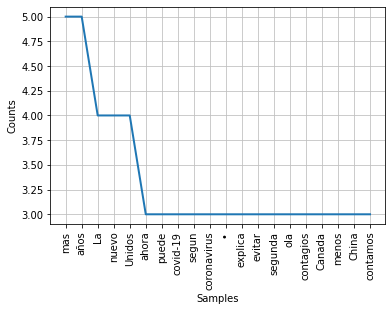

In [19]:
freq = FreqDist(filtro)
freq.plot(20)

## Step 4: Process Data

In [20]:
from nltk.classify import NaiveBayesClassifier

In [21]:
datos_excel = pd.read_excel(open('taggedTweets.xlsx','rb'))
datos_excel = pd.DataFrame(datos_excel)
sample = datos_excel.sample(len(datos_excel))
sample

,Tweet,Retweets,Favoritos,Sentimiento
822,RT @Abejaarr: #13Feb Anuncio a la comunidad de...,61,0,neu
265,RT @Mippcivzla: #EnFotos 📸| Sistema eléctrico ...,67,0,neg
87,RT @Abejaarr: #12Feb Manifestamos públicamente...,10,0,neg
1280,"RT @Abejaarr: #25Abril Un Día como hoy, hace #...",13,0,pos
143,El prof Carlos Najul de la Estación Experiment...,20,14,neg
...,...,...,...,...
1190,#Felizjueves #02deoct Te invitamos a visitar e...,3,2,pos
761,UNET presentó proyectos para divulgar cultura ...,0,2,neu
1205,RT @UNA_CLBolivar: Abiertas las Inscripciones ...,3,0,pos
103,Las Autoridades de la UCLA lamentan el falleci...,11,19,neg


In [22]:
def construirBolsaDePalabras(palabras):
    diccionario={}
    for palabra in word_tokenize(palabras):
        if palabra not in stopwordsList:
            diccionario[palabra]=1
    return diccionario

In [23]:
rasgosNegativos = []
rasgosPositivos = []
rasgosNeutrales = []
    
for indice_fila, fila in sample.iterrows():
    tweet_clean = clean_tweets_emoji(fila['Tweet'])
    tweet_clean = clean_tweets_regex(tweet_clean)
    if fila['Sentimiento'] == 'pos':
        rasgosPositivos.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))
    elif fila['Sentimiento'] == 'neu':
        rasgosNeutrales.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))
    else:
        rasgosNegativos.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))

In [24]:
len(rasgosPositivos)

454

In [25]:
rasgosPositivos[5]

({'invita': 1, 'ñoUNA2018': 1, 'via': 1}, 'pos')

In [26]:
divP=int(len(rasgosPositivos)*0.95)
divNeu=int(len(rasgosNeutrales)*0.95)
divNeg=int(len(rasgosNegativos)*0.95)
clasificadorSentimiento=NaiveBayesClassifier.train(rasgosPositivos[:divP]+rasgosNegativos[:divNeg]+rasgosNeutrales[:divNeu])

In [27]:
nltk.classify.util.accuracy(clasificadorSentimiento,rasgosPositivos[:divP]+rasgosNegativos[:divNeg]+rasgosNeutrales[:divNeu])

0.9450889404485692

In [28]:
nltk.classify.util.accuracy(clasificadorSentimiento,rasgosPositivos[divP:]+rasgosNegativos[divNeg:]+rasgosNeutrales[divNeu:])

0.7391304347826086

In [29]:
clasificadorSentimiento.show_most_informative_features()

Most Informative Features
                    UCLA = 1                 neg : neu    =     17.0 : 1.0
             Autoridades = 1                 neg : pos    =     15.7 : 1.0
                  invita = 1                 pos : neg    =     14.3 : 1.0
               Venezuela = 1                 neg : pos    =     10.7 : 1.0
                  Sabado = 1                 neu : pos    =     10.3 : 1.0
                Ciencias = 1                 neg : neu    =     10.3 : 1.0
                 Pruebas = 1                 neu : neg    =     10.3 : 1.0
                    años = 1                 pos : neu    =      9.0 : 1.0
                  inicia = 1                 pos : neg    =      9.0 : 1.0
                   Curso = 1                 neu : neg    =      9.0 : 1.0


In [30]:
tweet = "Hoy se lanza mi nuevo curso de introducción al lenguaje C! y además en un par de día se lanza mi nuevo curso de Creación de Videojuegos 3D con Unity!"

print(tweet)
tweet_clean = clean_tweets_emoji(tweet)
tweet_clean = clean_tweets_regex(tweet_clean)
bolsa=construirBolsaDePalabras(tweet_clean)
print(bolsa)

Hoy se lanza mi nuevo curso de introducción al lenguaje C! y además en un par de día se lanza mi nuevo curso de Creación de Videojuegos 3D con Unity!
{'Hoy': 1, 'lanza': 1, 'nuevo': 1, 'curso': 1, 'introduccion': 1, 'lenguaje': 1, 'C': 1, 'ademas': 1, 'par': 1, 'dia': 1, 'Creacion': 1, 'Videojuegos': 1, '3D': 1, 'Unity': 1}


In [31]:
clasificadorSentimiento.classify(bolsa)

'neu'

In [32]:
datos_csv = pd.read_csv('CNNEE.csv')
datos_csv

,Date,Day,Tweet,Retweets,Likes
0,Jun 16 2020,Jun 16,A los niños con trastorno por déficit de atenc...,4,20
1,Jun 16 2020,Jun 16,Este estudio utilizó modelos de transmisión pa...,11,20
2,Jun 16 2020,Jun 16,Las acciones de la compañía se han disparado m...,23,53
3,Jun 16 2020,Jun 16,RT @deportescnn: MLB: varios jugadores y perso...,4,0
4,Jun 16 2020,Jun 16,"La racha campeona del Bayern, entre las más lo...",6,34
5,Jun 16 2020,Jun 16,"RT @deportescnn: Entrenador de la NBA: ""No qui...",9,0
6,Jun 16 2020,Jun 16,Brasil reporta 34.918 nuevos casos de coronavi...,111,188
7,Jun 16 2020,Jun 16,Jeanine Áñez propuso esta postergación luego d...,16,27
8,Jun 16 2020,Jun 16,Una investigación realizada en el Reino Unido ...,113,171
9,Jun 16 2020,Jun 16,"RT @deportescnn: La racha campeona del Bayern,...",3,0


In [33]:
positive = []
neutral = []
negative = []

In [34]:
with open('CNNEEDataTag.csv', 'w', newline='', encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Tweet","Sentimiento"])
    
    for indice_fila, fila in datos_csv.iterrows():
        print(fila[2])
        tweet_clean = clean_tweets_emoji(fila[2])
        tweet_clean = clean_tweets_regex(tweet_clean)
        bolsa=construirBolsaDePalabras(tweet_clean)
        sent = clasificadorSentimiento.classify(bolsa)
        print("\033[0;31;40m "+sent+" \033[0m")
        
        writer.writerow([fila[2],sent])
        if sent == 'pos':
            positive.append(fila[2])
        elif sent == 'neu':
            neutral.append(fila[2])
        else:
            negative.append(fila[2])
        

A los niños con trastorno por déficit de atención e hiperactividad ahora se les puede recetar un videojuego… https://t.co/tFUX4xFZrL
 neg 
Este estudio utilizó modelos de transmisión para calcular la susceptibilidad ante la enfermedad y la relación de la… https://t.co/LZcPEwBGrg
 neu 
Las acciones de la compañía se han disparado más del 250% en lo que va del año. Zoom ahora vale más de 67.000 millo… https://t.co/pHOGz61Y6C
 neg 
RT @deportescnn: MLB: varios jugadores y personal dan positivo por covid-19, según reporte https://t.co/xPQBJwj7lY
 neg 
La racha campeona del Bayern, entre las más longevas de Europa https://t.co/CnjVcZUfgv
 neg 
RT @deportescnn: Entrenador de la NBA: "No quiero morir por ser negro" https://t.co/iTGk0aGb3c
 pos 
Brasil reporta 34.918 nuevos casos de coronavirus en un día https://t.co/Ym5VxdiiDd https://t.co/Ywx5vQK6VQ
 pos 
Jeanine Áñez propuso esta postergación luego de una serie de cuestionamientos de sectores políticos de Bolivia, que… https://t.co/knQ9Rb4g

## Step 5: Show Data

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

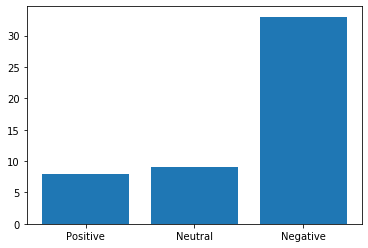

In [36]:
fig = plt.figure(u'Gráfica de barras')
ax = fig.add_subplot(111)

nombres = ['Positive','Neutral','Negative']
datos = [len(positive),len(neutral),len(negative)]
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(nombres)

plt.show()

### Bonus

In [37]:
from wordcloud import WordCloud

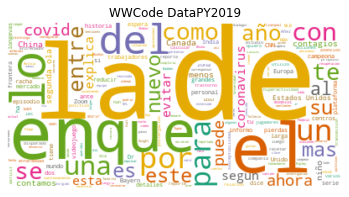

In [38]:
wordcloud = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate(tweets_clean)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WWCode DataPY2019")
plt.show()

# English

## Step 1: Extract Data

In [39]:
timeline = api.user_timeline(id="elonmusk", count=50 )

with open('elonmusk.csv', 'w', newline='', encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Day", "Tweet", "Retweets", "Likes"])
    
    for tweet in timeline:
        print(tweet.text)
        data = [tweet.created_at.date().strftime("%b %d %Y "), tweet.created_at.date().strftime("%b %d"), tweet.text, tweet.retweet_count, tweet.favorite_count]
        writer.writerow(data)

@NYYScoreKeep Not sure. They’re pretty close together.
@westcoastbill It will be real
@cisoml @Erdayastronaut @russ_parrish Maybe Incat https://t.co/qHbJcMocFg
@flcnhvy There will be many test flights before commercial passengers are carried. First Earth to Earth test flight… https://t.co/gKyeCVkLeQ
@Erdayastronaut @russ_parrish We need to be far enough away so as not to bother heavily populated areas. The launch… https://t.co/UHZT7HfVsh
@YarLP Directionally correct, but Zenit is an order of magnitude smaller than Starship system &amp; doesn’t come back &amp; land
@21aeax US law requires at least a green card to be hired at SpaceX, as rockets are considered advanced weapons technology
@russ_parrish Pretty much
@AgoleiD Illuminaughty haha
SpaceX is building floating, superheavy-class spaceports for Mars, moon &amp; hypersonic travel around Earth https://t.co/zLJjz43hKw
@LabPadre Maybe some Flextape
@LabPadre No problem, we can buff it out
@Teslarati Fairing reuse is looking good
@physor

## Step 2: Process Data

In [40]:
csv_data = pd.read_csv('elonmusk.csv')
csv_data

,Date,Day,Tweet,Retweets,Likes
0,Jun 17 2020,Jun 17,@NYYScoreKeep Not sure. They’re pretty close t...,7,90
1,Jun 16 2020,Jun 16,@westcoastbill It will be real,224,3954
2,Jun 16 2020,Jun 16,@cisoml @Erdayastronaut @russ_parrish Maybe In...,14,403
3,Jun 16 2020,Jun 16,@flcnhvy There will be many test flights befor...,195,2307
4,Jun 16 2020,Jun 16,@Erdayastronaut @russ_parrish We need to be fa...,136,2324
5,Jun 16 2020,Jun 16,"@YarLP Directionally correct, but Zenit is an ...",66,1565
6,Jun 16 2020,Jun 16,@21aeax US law requires at least a green card ...,54,747
7,Jun 16 2020,Jun 16,@russ_parrish Pretty much,59,1911
8,Jun 16 2020,Jun 16,@AgoleiD Illuminaughty haha,345,4611
9,Jun 16 2020,Jun 16,"SpaceX is building floating, superheavy-class ...",6108,47461


In [41]:
popularity_list = []
num_list = []
num = 1

for tweet in csv_data['Tweet']:
    print(tweet)
    
    analysis = TextBlob(tweet)
    analysis = analysis.sentiment
    print(analysis)
    popularity = analysis.polarity
    popularity_list.append(popularity)
    num_list.append(num)
    num = num + 1

@NYYScoreKeep Not sure. They’re pretty close together.
Sentiment(polarity=0.0, subjectivity=0.9444444444444444)
@westcoastbill It will be real
Sentiment(polarity=0.2, subjectivity=0.30000000000000004)
@cisoml @Erdayastronaut @russ_parrish Maybe Incat https://t.co/qHbJcMocFg
Sentiment(polarity=0.0, subjectivity=0.0)
@flcnhvy There will be many test flights before commercial passengers are carried. First Earth to Earth test flight… https://t.co/gKyeCVkLeQ
Sentiment(polarity=0.25, subjectivity=0.27777777777777773)
@Erdayastronaut @russ_parrish We need to be far enough away so as not to bother heavily populated areas. The launch… https://t.co/UHZT7HfVsh
Sentiment(polarity=-0.03333333333333333, subjectivity=0.6666666666666666)
@YarLP Directionally correct, but Zenit is an order of magnitude smaller than Starship system &amp; doesn’t come back &amp; land
Sentiment(polarity=0.0, subjectivity=0.25)
@21aeax US law requires at least a green card to be hired at SpaceX, as rockets are considered a

## Step 3: ShowData

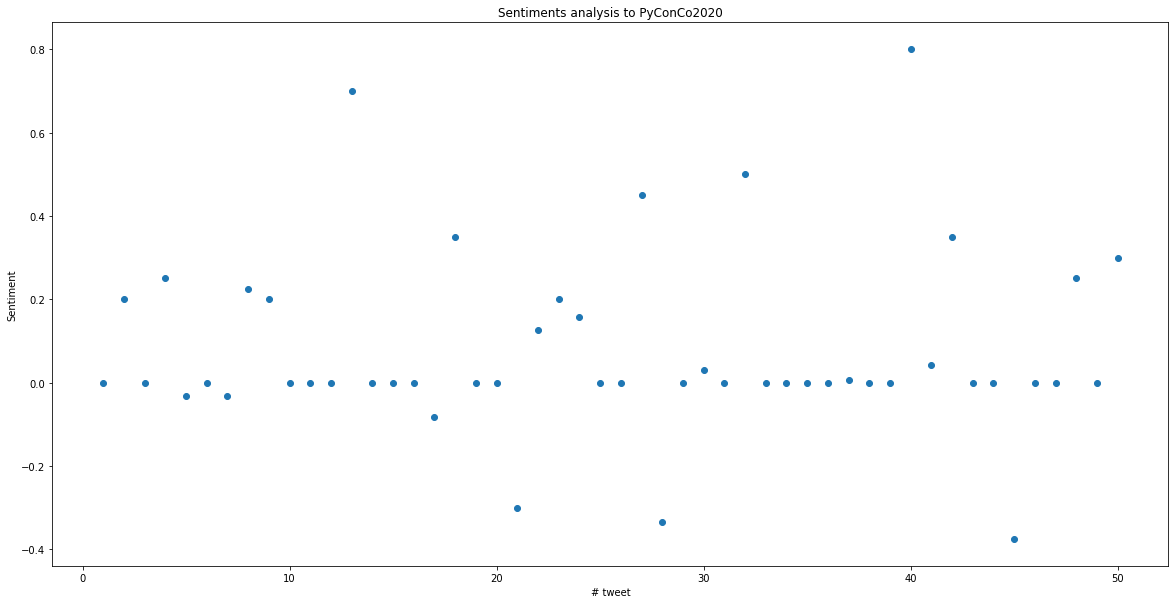

In [42]:
plt.figure(figsize=(20,10))
plt.scatter(num_list, popularity_list)
#plt.scatter(excel_data['Day'], popularity_list)
plt.title("Sentiments analysis to PyConCo2020")
plt.xlabel("# tweet")
plt.ylabel("Sentiment")
plt.show()